# 📘 Einführung in Data Science und ML – Wochenaufgabe

## 🔍 Aufgabe
- GitHub Codespace erstellen
- Die Dateien `kiwo.csv`, `umsatzdaten_gekuerzt.csv` und `wetter.csv` aus dem Repository laden:
  https://github.com/opencampus-sh/einfuehrung-in-data-science-und-ml
- Daten einlesen und analysieren (siehe Aufgabenstellung im Kurs)

## 📥 Daten direkt von GitHub laden

In [3]:
import pandas as pd

# GitHub-RAW-URLs
base_url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/"
files = {
    "umsatz": "umsatzdaten_gekuerzt.csv",
    "wetter": "wetter.csv",
    "kiwo": "kiwo.csv"
}

# Daten direkt von GitHub laden
# Hinweis: Diese Methode sorgt dafür, dass stets die aktuelle Version verwendet wird.
df_umsatz = pd.read_csv(base_url + files["umsatz"])
df_wetter = pd.read_csv(base_url + files["wetter"])
df_kiwo = pd.read_csv(base_url + files["kiwo"])

# Vorschau
print("Umsatzdaten:")
display(df_umsatz.head())
print("Wetterdaten:")
display(df_wetter.head())
print("KiWo-Daten:")
display(df_kiwo.head())

Umsatzdaten:


,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754


Wetterdaten:


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,2012-01-01,8.0,9.8250,14,58.0
1,2012-01-02,7.0,7.4375,12,NaN
2,2012-01-03,8.0,5.5375,18,63.0
3,2012-01-04,4.0,5.6875,19,80.0
4,2012-01-05,6.0,5.3000,23,80.0


KiWo-Daten:


,Datum,KielerWoche
0,2012-06-16,1
1,2012-06-17,1
2,2012-06-18,1
3,2012-06-19,1
4,2012-06-20,1


## 📊 Durchschnittlicher Umsatz pro Wochentag (Sortiert Montag–Sonntag)

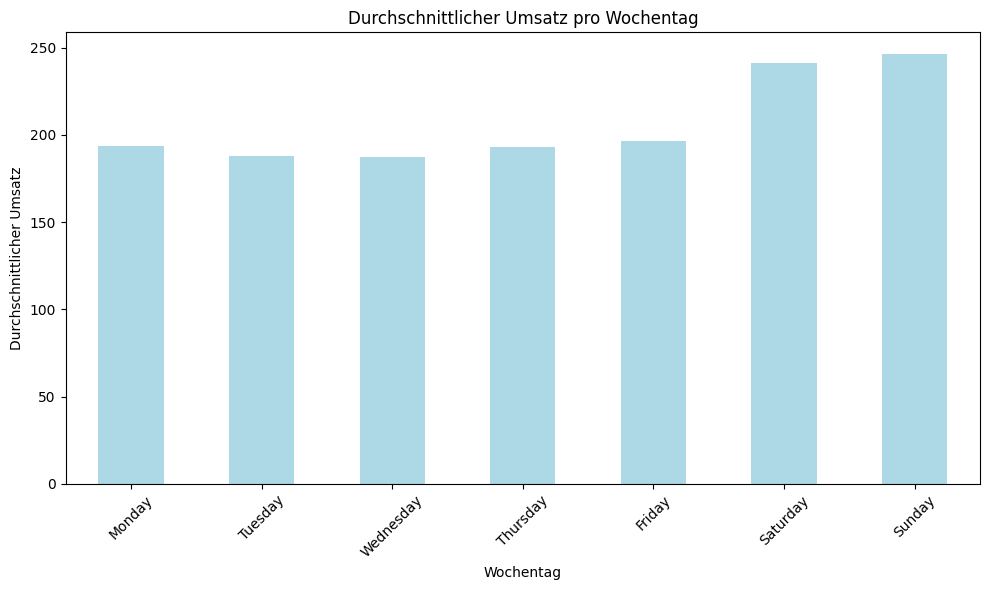

In [3]:
import matplotlib.pyplot as plt

# Datum als Datetime interpretieren
df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])
df_umsatz['Weekday'] = df_umsatz['Datum'].dt.day_name()

# Gruppieren und Mittelwerte berechnen
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sales = df_umsatz.groupby('Weekday')['Umsatz'].mean().reindex(weekday_order)

# Plot
avg_sales.plot(kind='bar', color='lightblue', figsize=(10, 6))
plt.title('Durchschnittlicher Umsatz pro Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittlicher Umsatz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 Erweiterung: Konfidenzintervalle mit Seaborn

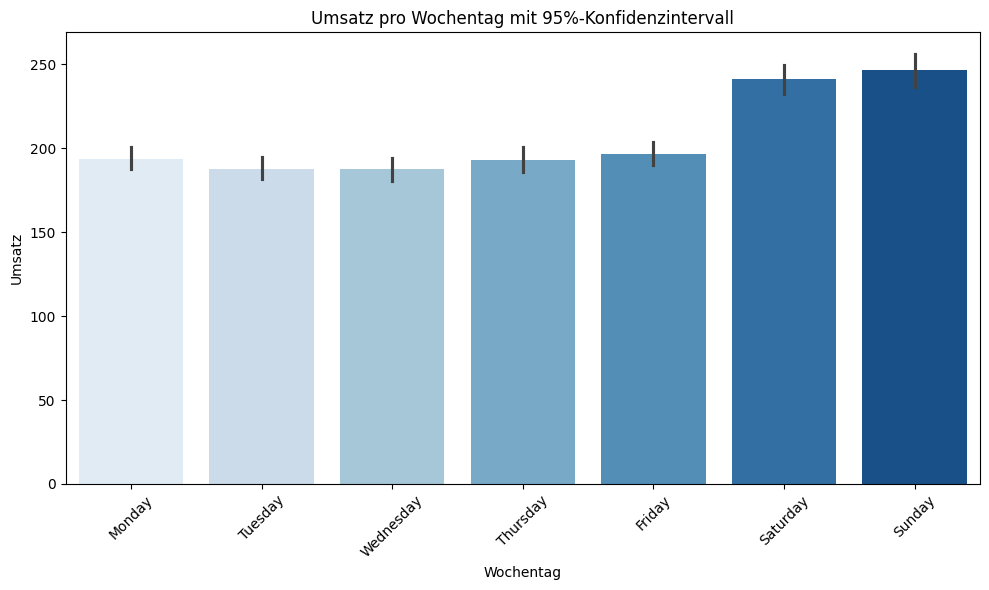

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=df_umsatz, x='Weekday', y='Umsatz', order=weekday_order, errorbar=('ci', 95), hue='Weekday', palette='Blues')
plt.title('Umsatz pro Wochentag mit 95%-Konfidenzintervall')
plt.xlabel('Wochentag')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
